In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('/Users/renzocahuana/Documents/Coding_dojo/Core_Exercise_Github/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


The dataset has succesfully loaded!

The goal is to help the store understand the properties of the products and establishments that play a crucial role in increasing sales.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can see that there are null values in two columns. Additionally, we perform a quick inspection of the data types present in each column.

In [47]:
df['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [48]:
average_sales = df['Item_Outlet_Sales'].mean()
average_sales


2181.288913575032

In [49]:
max_item_mrp = df['Item_MRP'].max()
max_item_mrp


266.8884

In [50]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [51]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

For the purpose of this exercise, we will replace the data using the average of both. Both the product weight and the store size can be fixed in that way.

In [52]:
df.duplicated().sum()


0

There are no duplicates to worry about.

In [53]:
(df.isnull().sum() / df.shape[0]) * 100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Here we can see the percentage of null values in the columns. As a recommendation, if the data is greater than 10%, it is recommended to try to fill it with other means. Alternatively, if there is a large number of null values, it is evaluated whether that column is necessary for the data analysis.

In [54]:
df_1 = df.copy()
df_1['Item_Weight'].fillna(df_1['Item_Weight'].mean(), inplace=True)
df_1['Outlet_Size'].fillna(df_1['Outlet_Size'].mode()[0], inplace=True)
df_1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


/var/folders/r7/_8hlpyjs1471x6vcvkn2l9bm0000gn/T/ipykernel_2003/1141298458.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['Item_Weight'].fillna(df_1['Item_Weight'].mean(), inplace=True)
/var/folders/r7/_8hlpyjs1471x6vcvkn2l9bm0000gn/T/ipykernel_2003/1141298458.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [55]:
df_1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


There are no abnormal values in this dataset at the moment. And there are no instructions to change the data types of the columns.

In [56]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


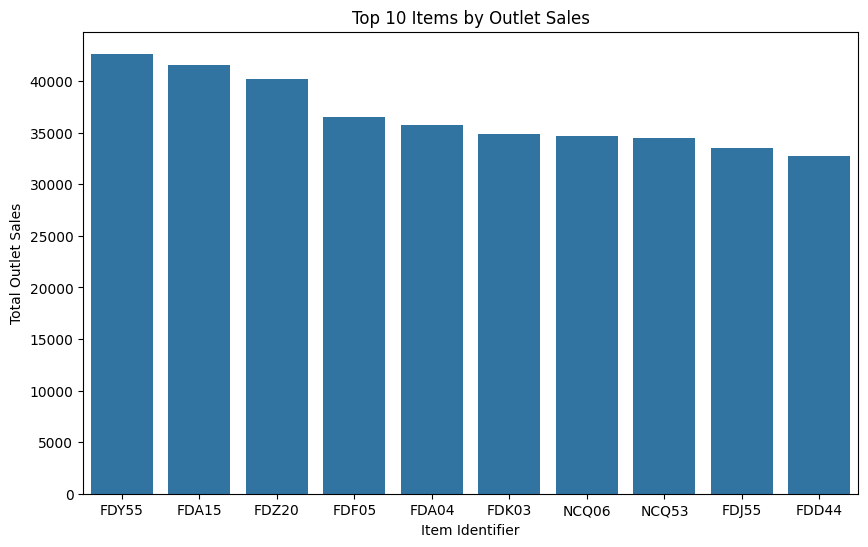

In [57]:
top_items = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values)

plt.xlabel('Item Identifier')
plt.ylabel('Total Outlet Sales')
plt.title('Top 10 Items by Outlet Sales')

plt.show()

We can see that this graph displays the best-selling items in the store by quantity. With this information, logistics and promotion decisions can be made for all products.

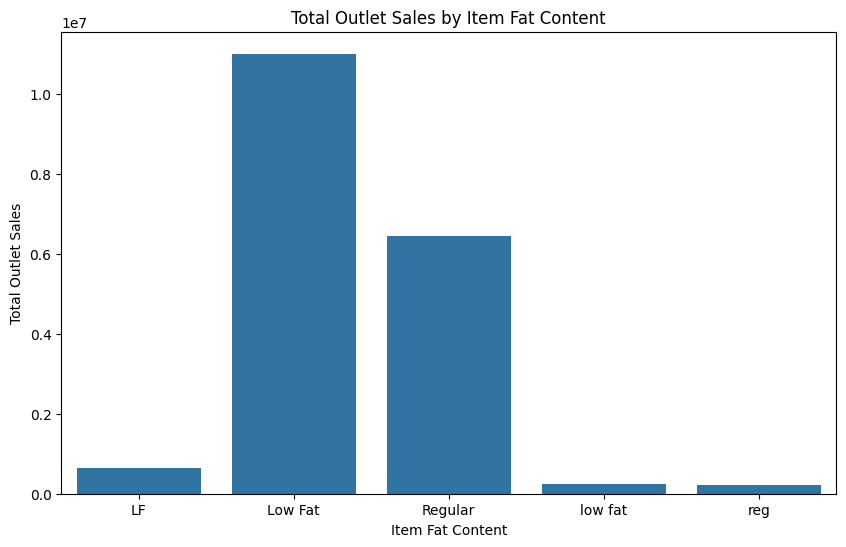

In [59]:
fat_content_sales = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=fat_content_sales.index, y=fat_content_sales.values)

plt.xlabel('Item Fat Content')
plt.ylabel('Total Outlet Sales')
plt.title('Total Outlet Sales by Item Fat Content')

plt.show()

We can see that the highest profitability is found in Low Fat products. With this, we can promote more marketing and promotional strategies to boost that type of products.

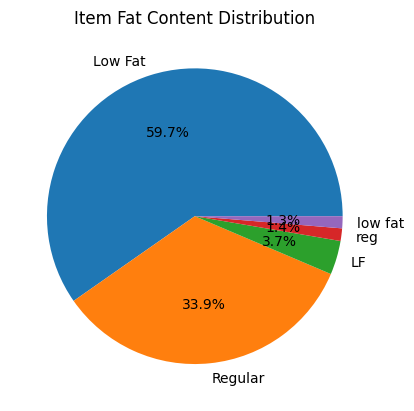

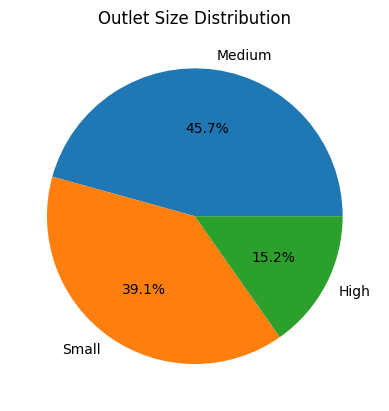

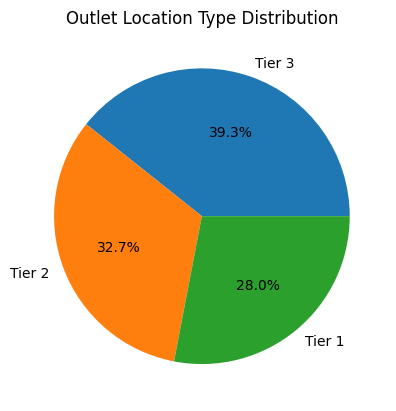

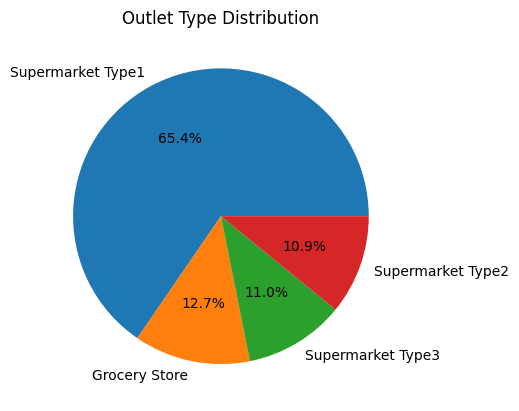

In [61]:
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Item Fat Content Distribution')
plt.ylabel('')

plt.show()


df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outlet Size Distribution')
plt.ylabel('')

plt.show()


df['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outlet Location Type Distribution')
plt.ylabel('')

plt.show()

df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outlet Type Distribution')
plt.ylabel('')

plt.show()
